# Heart Disease Prediction using Decision Tree, Random Forest, SVM, kNN, Logistic Regression, Naive Bayes & Voting Ensemble Cassifiers

In this notebook, we'll try to train multiple classifiers using various Machine Learning models & in the end, attempt to use Ensemble Learning to combine multiple classifiers to obtain better test-set accuracy.

## Importing necessary libraries

In [81]:
#For importing & manipulating the dataset
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For building & training models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

#For evaluating models
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

#Miscellaneous
import warnings
warnings.filterwarnings('ignore')
import pickle

## Importing the dataset

We're going to use a dataset by UCI which can be found at : 
https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
df = pd.read_csv('kaggle-UCl-heart-disease-dataset.csv')

## Exploratory Data Analysis

In this section, we're going to analyze the data which is going to aid us in building the models further down the line.

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

The following info has been provided regarding the feature columns in the website containing the dataset.


Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [6]:
df.shape

(303, 14)

We only have 303 examples - This is not a big dataset, hence we have to take special care while building the models as small datasets are usually prone to overfitting.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#Checking no. of missing values for each feature column in our dataset
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

None !

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002F8A126EBC8>,
      dtype=object)

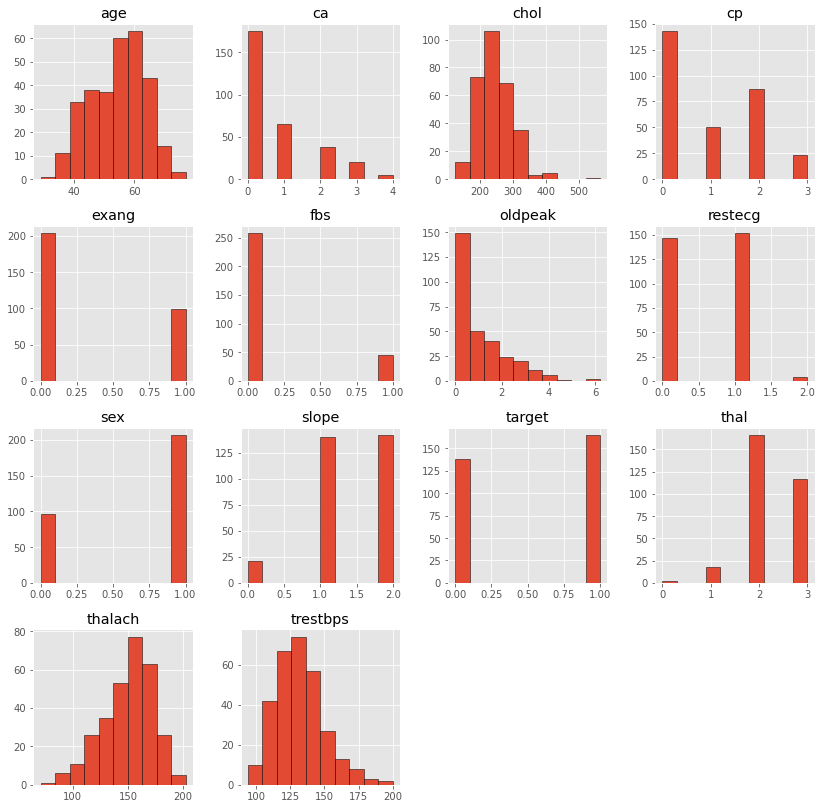

In [9]:
#plotting the distribution of each of the features
plt.style.use('ggplot')
fig=plt.figure(figsize = (14,14))
ax = fig.gca()
df.hist(ax=ax,ec='black')

In [10]:
#checking if the class distribution is uniform
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

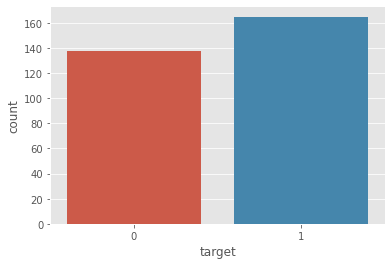

In [11]:
#visualizing class distribution
sns.countplot(x='target',data=df)

Distribution of both the classes is almost uniform.

In [12]:
#Get Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


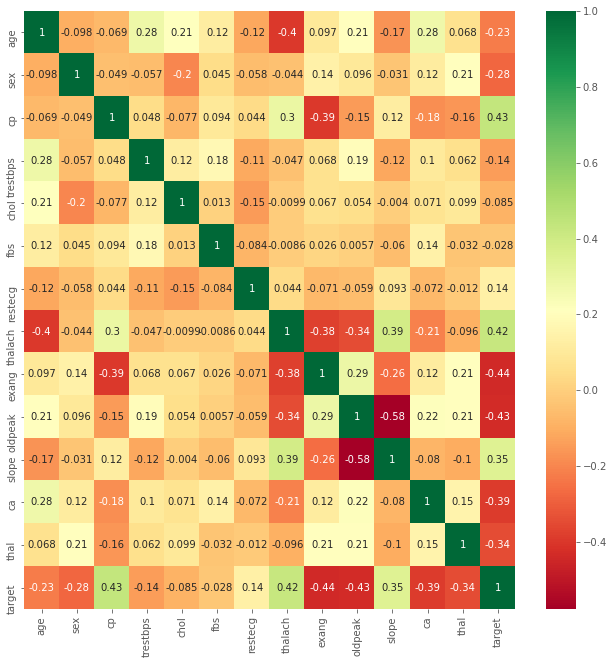

In [13]:
#Visualize correlation matrix using heat map
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

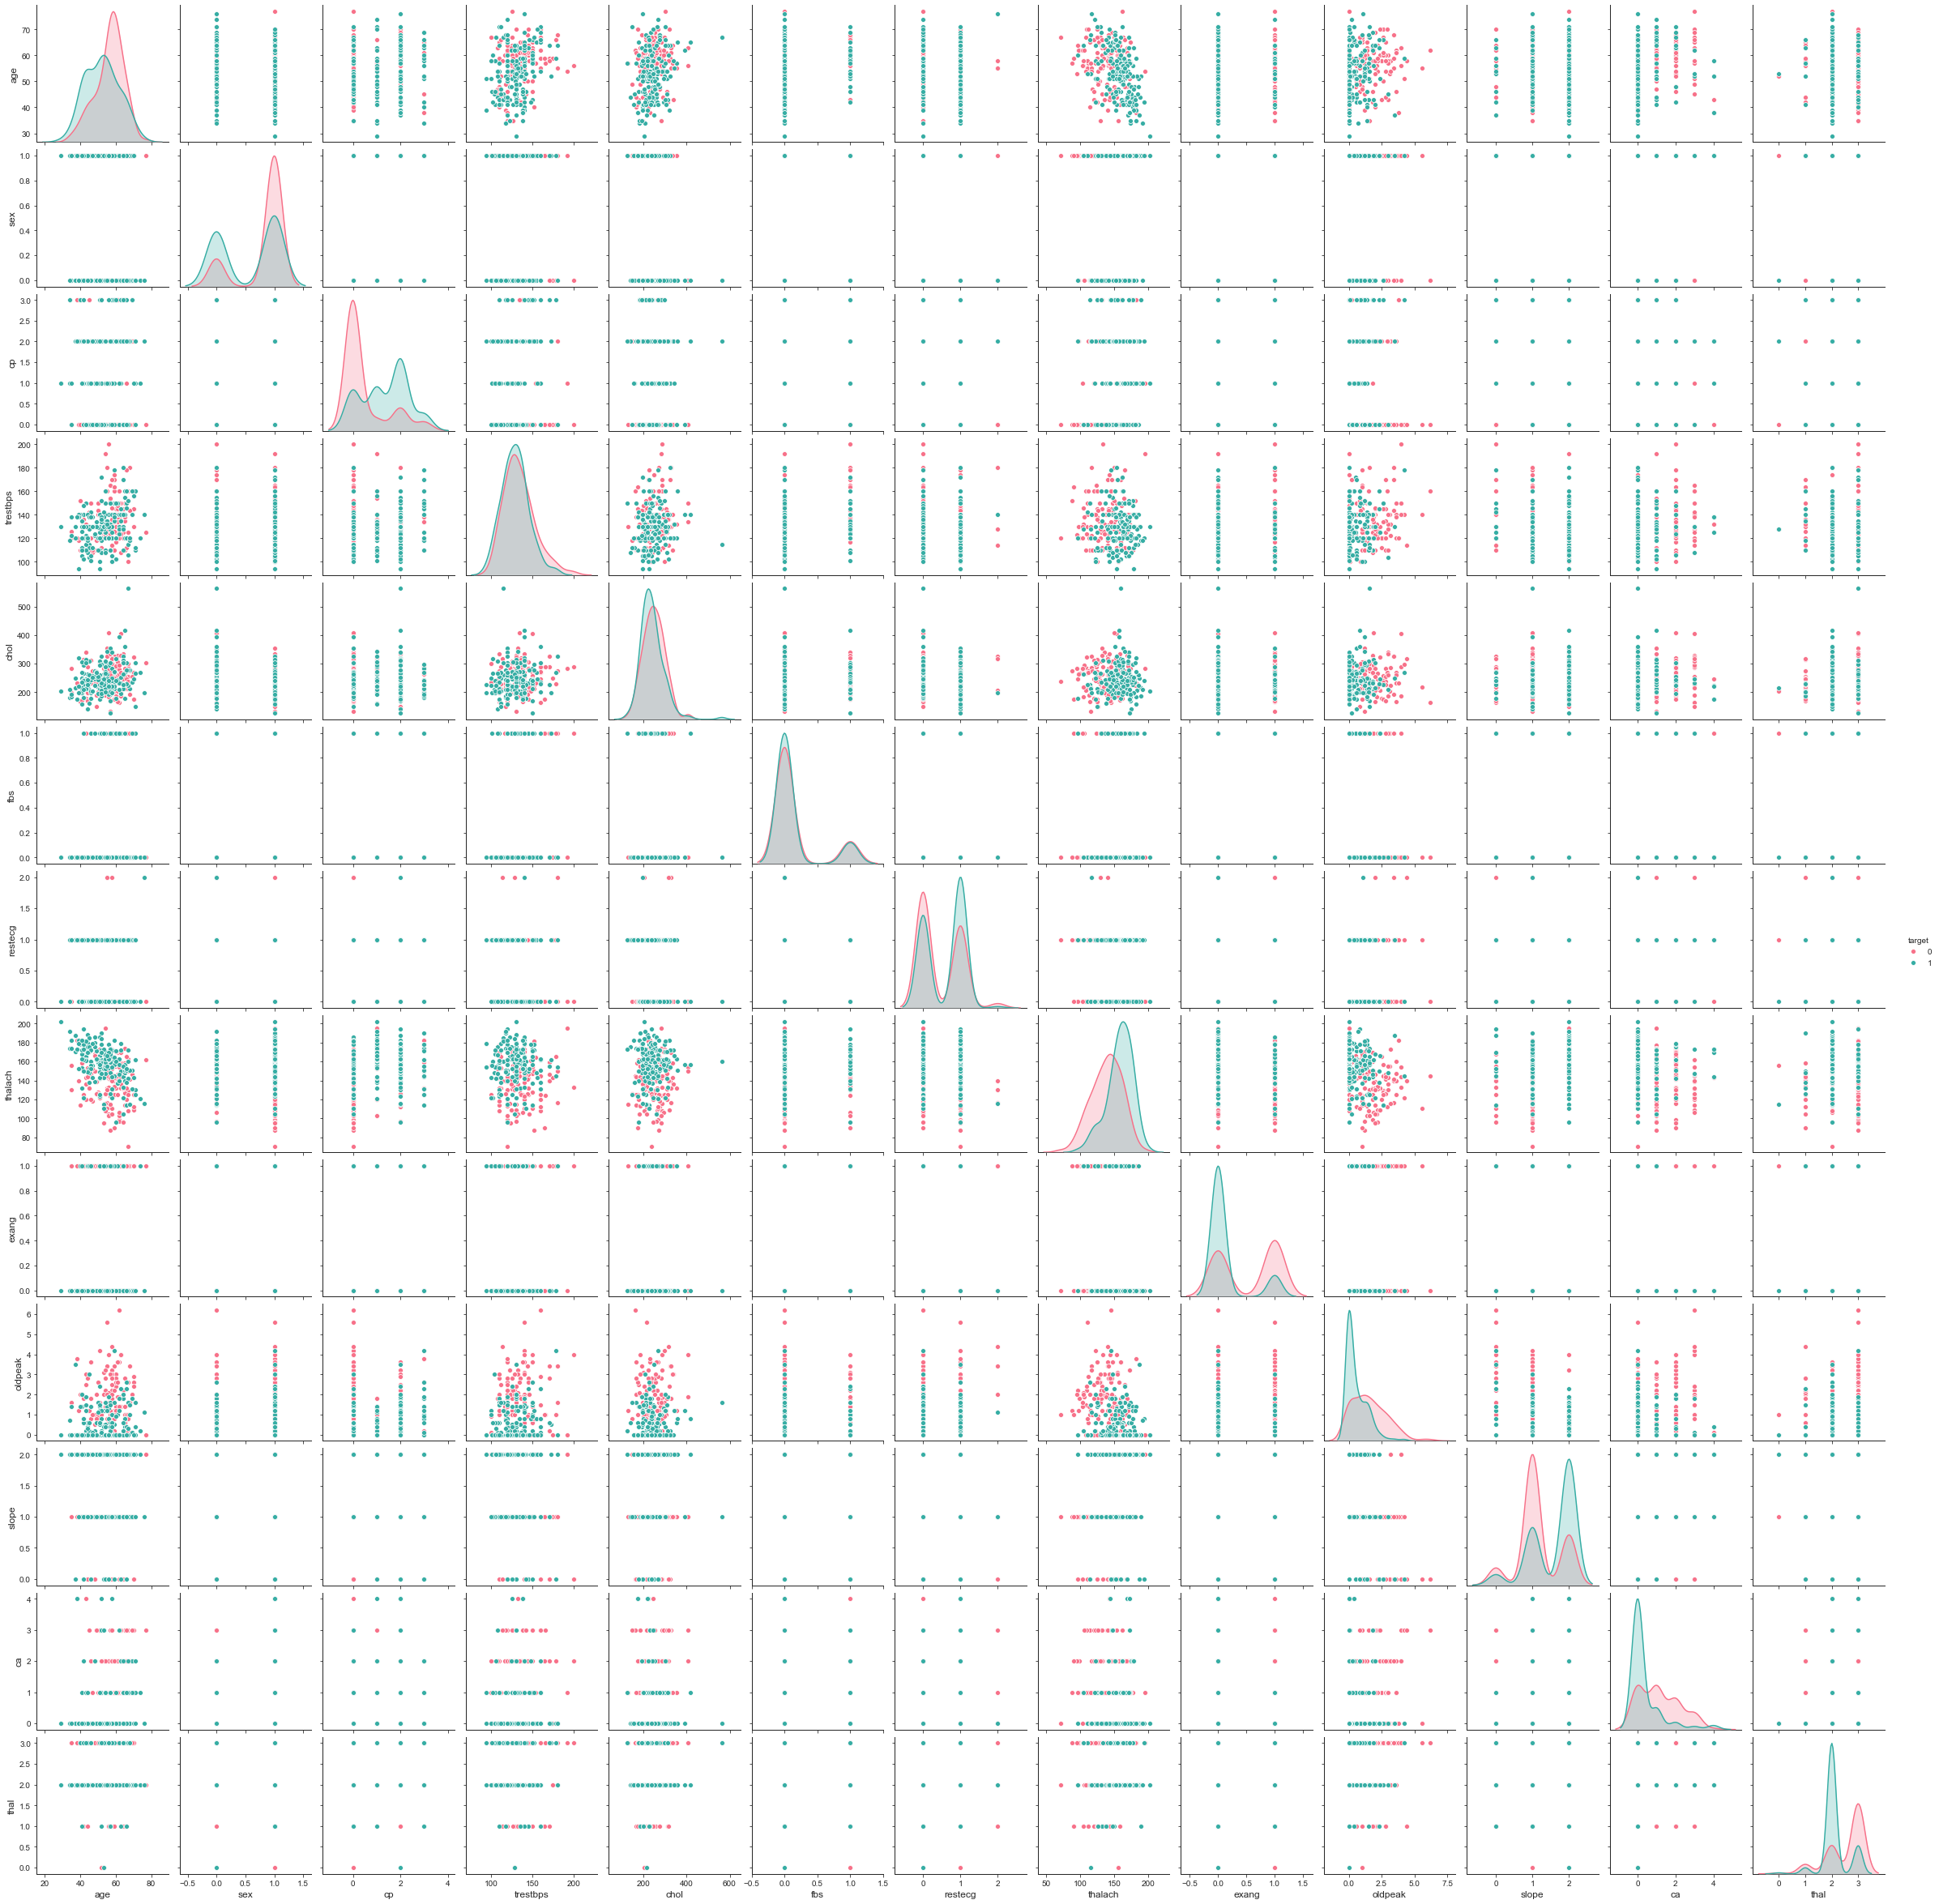

In [14]:
#plotting features pairwise to gain more insight into data
sns.set_style("ticks")
sns.pairplot(df,hue = 'target',diag_kind = "kde",kind = "scatter",palette = "husl")

## Data Preparation
In this section, we'll prepare the dataset to feed it into the models.

In [15]:
#Shuffling the dataset
df = df.sample(frac=1,random_state=1).reset_index(drop=True)

In [16]:
#Creating dummy columns out of categorical variables
df_dummies = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [17]:
df_dummies.head(5)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,62,160,164,145,6.2,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
1,56,130,221,163,0.0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1
2,48,130,256,150,0.0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,60,130,206,132,2.4,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
4,50,150,243,128,2.6,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1


In [18]:
# Extracting labels column from feature matrix
X = df_dummies.drop(['target'],axis = 1)
y = df_dummies['target']

In [19]:
#Splitting the training set (80% alloted) & test set (20% alloted).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
#Scaling continous variables in training & test set
scaler=MinMaxScaler()
continuous_vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_train[continuous_vars]=scaler.fit_transform(X_train[continuous_vars])
X_test[continuous_vars]=scaler.transform(X_test[continuous_vars])

In [21]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
62,0.891892,0.547170,0.344749,0.785047,0.000000,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
127,0.513514,0.320755,0.205479,0.252336,0.000000,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
111,0.540541,0.924528,0.358447,1.000000,0.000000,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
287,0.351351,0.339623,0.289954,0.850467,0.000000,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
108,0.378378,0.339623,0.271689,0.859813,0.035714,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.216216,0.245283,0.260274,0.990654,0.142857,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
255,0.621622,0.528302,0.095890,0.803738,0.285714,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
72,0.972973,0.339623,0.447489,0.196262,0.428571,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
235,0.837838,0.150943,0.278539,0.654206,0.107143,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0


In [22]:
X_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
204,0.540541,0.386792,0.406393,0.766355,0.000000,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
159,0.378378,0.264151,0.219178,0.915888,0.000000,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
219,0.756757,0.339623,0.239726,0.542056,0.321429,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
174,0.324324,0.245283,0.280822,0.523364,0.142857,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1
184,0.567568,0.622642,0.372146,0.532710,0.142857,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.756757,0.622642,0.086758,0.532710,1.107143,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
288,0.756757,0.415094,0.383562,0.168224,0.339286,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
259,0.756757,0.245283,0.353881,0.140187,0.250000,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
179,0.837838,0.386792,0.292237,0.364486,0.500000,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1


In [23]:
y_train

62     1
127    1
111    0
287    1
108    1
      ..
203    1
255    1
72     0
235    0
37     0
Name: target, Length: 242, dtype: int64

In [24]:
y_test

204    1
159    1
219    1
174    0
184    0
      ..
0      0
288    0
259    0
179    0
110    0
Name: target, Length: 61, dtype: int64

In [25]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [87]:
#saving preprocessed Numpy arrays for later usage
np.save('X_train.npy',X_train)
np.save('X_test.npy',X_test)
np.save('y_train.npy',y_train)
np.save('y_test.npy',y_test)

To load the numpy arrays for later usage, use the following lines of code :
```python
X_train=np.load('X_train.npy')
y_train=np.load('y_train.npy')
X_test=np.load('X_test.npy')
y_test=np.load('y_test.npy')
```

## Building & Training various models
In this section, we'll train multiple models & we'll tune the hyperparameters of each of the models using Grid Search & try to evaluate the performance of the best performing models using Classification Reports, Confusion Matrices, Accuracy Score & F1 Score

In [26]:
model_dict={}

### 1. KNN (k-nearest neighbors) Classifier

In [27]:
param_dict_knn={
    'n_neighbors':np.arange(2,20)
}
clf_grid_knn=GridSearchCV(KNeighborsClassifier(),param_grid=param_dict_knn,cv=10,n_jobs=-1)
clf_grid_knn.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [28]:
print(clf_grid_knn.best_estimator_)
print(clf_grid_knn.best_params_)
print(clf_grid_knn.best_score_)

KNeighborsClassifier(n_neighbors=7)
{'n_neighbors': 7}
0.8808333333333334


In [29]:
print('Training set Accuracy Score :',clf_grid_knn.score(X_train,y_train))
print('Test set Accuracy Score :',clf_grid_knn.score(X_test,y_test))

Training set Accuracy Score : 0.9090909090909091
Test set Accuracy Score : 0.8360655737704918


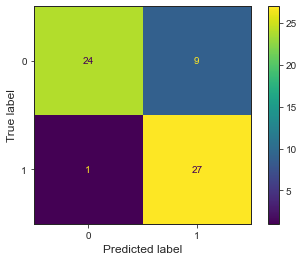

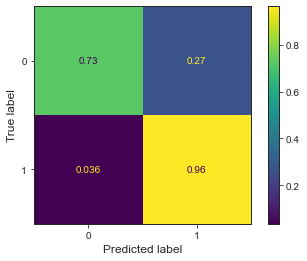

In [30]:
plot_confusion_matrix(clf_grid_knn.best_estimator_,X_test,y_test)
plot_confusion_matrix(clf_grid_knn,X_test,y_test,normalize='true')

In [31]:
y_pred=clf_grid_knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83        33
           1       0.75      0.96      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.85      0.84        61
weighted avg       0.86      0.84      0.84        61



In [32]:
model_dict['KNN']=clf_grid_knn

### 2. Decision Tree Classifier

In [33]:
max_features = list(range(1,X_train.shape[1]))
max_features.append(None)
param_dict_dt={
    'criterion':['gini','entropy'],
    'max_depth':np.append(np.arange(1,10),None),
    'min_samples_split':np.linspace(0.1, 1.0, 10),
    'min_samples_leaf':np.linspace(0.1, 0.5, 5),
    'max_features':max_features
}
clf_grid_dt=GridSearchCV(DecisionTreeClassifier(random_state=1),param_grid=param_dict_dt,cv=10,n_jobs=-1)
clf_grid_dt.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9, None], dtype=object),
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29,
                                          None],
                         'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [34]:
print(clf_grid_dt.best_estimator_)
print(clf_grid_dt.best_params_)
print(clf_grid_dt.best_score_)

DecisionTreeClassifier(max_depth=4, max_features=26, min_samples_leaf=0.1,
                       min_samples_split=0.1, random_state=1)
{'criterion': 'gini', 'max_depth': 4, 'max_features': 26, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
0.8101666666666667


In [35]:
print('Training set Accuracy Score :',clf_grid_dt.score(X_train,y_train))
print('Test set Accuracy Score :',clf_grid_dt.score(X_test,y_test))

Training set Accuracy Score : 0.8264462809917356
Test set Accuracy Score : 0.7704918032786885


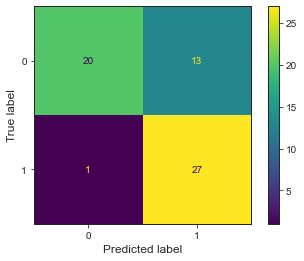

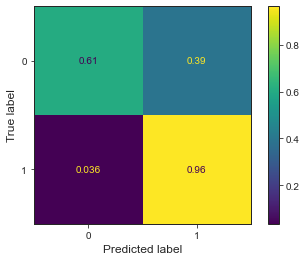

In [36]:
plot_confusion_matrix(clf_grid_dt.best_estimator_,X_test,y_test)
plot_confusion_matrix(clf_grid_dt,X_test,y_test,normalize='true')

In [37]:
y_pred=clf_grid_dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.61      0.74        33
           1       0.68      0.96      0.79        28

    accuracy                           0.77        61
   macro avg       0.81      0.79      0.77        61
weighted avg       0.83      0.77      0.77        61



In [38]:
model_dict['DecisionTree']=clf_grid_dt

### 3. Random Forest Classifier

In [46]:
max_features = list(range(1,X_train.shape[1]))
max_features.append(None)
param_dict_rf={
    'bootstrap': [True],
    'n_estimators':np.arange(50,151,10),
    'criterion':['gini','entropy'],
    'max_depth':np.append(np.arange(1,10),None),
    'min_samples_split':[0.1],
    'min_samples_leaf':[0.1],
    'max_features':max_features
}
clf_grid_rf=GridSearchCV(RandomForestClassifier(random_state=1),param_grid=param_dict_rf,cv=10,n_jobs=-1)
clf_grid_rf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9, None], dtype=object),
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29,
                                          None],
                         'min_samples_leaf': [0.1], 'min_samples_split': [0.1],
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150])})

In [47]:
print(clf_grid_rf.best_estimator_)
print(clf_grid_rf.best_params_)
print(clf_grid_rf.best_score_)

RandomForestClassifier(max_depth=2, max_features=12, min_samples_leaf=0.1,
                       min_samples_split=0.1, n_estimators=140, random_state=1)
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 12, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 140}
0.8685


In [48]:
print('Training set Accuracy Score :',clf_grid_rf.score(X_train,y_train))
print('Test set Accuracy Score :',clf_grid_rf.score(X_test,y_test))

Training set Accuracy Score : 0.8636363636363636
Test set Accuracy Score : 0.8360655737704918


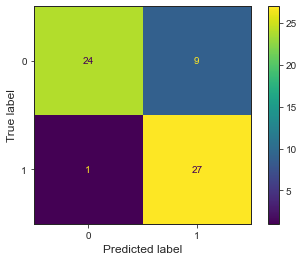

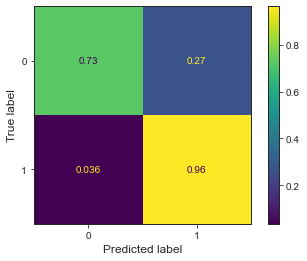

In [49]:
plot_confusion_matrix(clf_grid_rf.best_estimator_,X_test,y_test)
plot_confusion_matrix(clf_grid_rf,X_test,y_test,normalize='true')

In [50]:
y_pred=clf_grid_rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83        33
           1       0.75      0.96      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.85      0.84        61
weighted avg       0.86      0.84      0.84        61



In [51]:
model_dict['RandomForest']=clf_grid_rf

### 4. SVM (Support Vector Machine) classifier

In [52]:
param_dict_svm={
    'C':[0.001, 0.01, 0.1, 1, 10],
    'kernel':['linear','poly','rbf'],
    'degree':[2,3,4,5,6],
    'gamma':[0.001, 0.01, 0.1, 1,'scale','auto']
}
clf_grid_svm=GridSearchCV(SVC(random_state=1),param_grid=param_dict_svm,cv=10,n_jobs=-1)
clf_grid_svm.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'degree': [2, 3, 4, 5, 6],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [53]:
print(clf_grid_svm.best_estimator_)
print(clf_grid_svm.best_params_)
print(clf_grid_svm.best_score_)

SVC(C=1, degree=6, gamma=0.1, kernel='poly', random_state=1)
{'C': 1, 'degree': 6, 'gamma': 0.1, 'kernel': 'poly'}
0.8686666666666667


In [54]:
print('Training set Accuracy Score :',clf_grid_svm.score(X_train,y_train))
print('Test set Accuracy Score :',clf_grid_svm.score(X_test,y_test))

Training set Accuracy Score : 0.9338842975206612
Test set Accuracy Score : 0.819672131147541


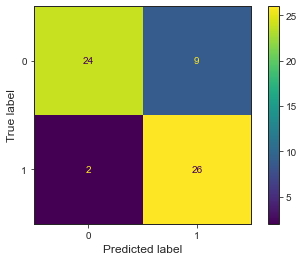

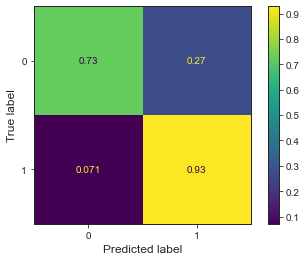

In [55]:
plot_confusion_matrix(clf_grid_svm.best_estimator_,X_test,y_test)
plot_confusion_matrix(clf_grid_svm,X_test,y_test,normalize='true')

In [56]:
y_pred=clf_grid_svm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.74      0.93      0.83        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.84      0.82      0.82        61



In [57]:
model_dict['SVM']=clf_grid_svm

### 5. Gaussian Naive Bayes Classifier

In [58]:
param_dict_nb={
    'var_smoothing':np.logspace(0,-13, num=14)
}
clf_grid_nb=GridSearchCV(GaussianNB(),param_grid=param_dict_nb,cv=10,n_jobs=-1)
clf_grid_nb.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09, 1.e-10, 1.e-11, 1.e-12, 1.e-13])})

In [59]:
print(clf_grid_nb.best_estimator_)
print(clf_grid_nb.best_params_)
print(clf_grid_nb.best_score_)

GaussianNB(var_smoothing=1.0)
{'var_smoothing': 1.0}
0.8476666666666667


In [60]:
print('Training set Accuracy Score :',clf_grid_nb.score(X_train,y_train))
print('Test set Accuracy Score :',clf_grid_nb.score(X_test,y_test))

Training set Accuracy Score : 0.8677685950413223
Test set Accuracy Score : 0.8032786885245902


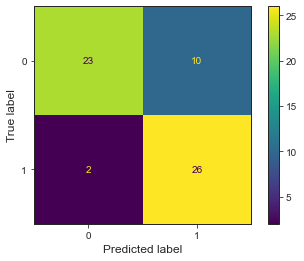

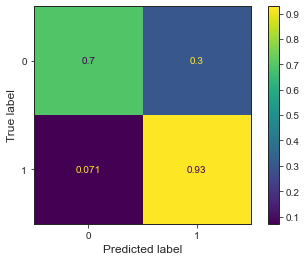

In [61]:
plot_confusion_matrix(clf_grid_nb.best_estimator_,X_test,y_test)
plot_confusion_matrix(clf_grid_nb,X_test,y_test,normalize='true')

In [62]:
y_pred=clf_grid_nb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.70      0.79        33
           1       0.72      0.93      0.81        28

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61



In [63]:
model_dict['NaiveBayes']=clf_grid_nb

### 6. Logistic Regression Classifier

In [64]:
param_dict_lr={
    'penalty':['l1', 'l2','elasticnet'],
    'C':np.logspace(-5,5,11),
    'solver':['newton-cg','lbfgs','liblinear']
}
clf_grid_lr=GridSearchCV(LogisticRegression(random_state=1),param_grid=param_dict_lr,cv=10,n_jobs=-1)
clf_grid_lr.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [65]:
print(clf_grid_lr.best_estimator_)
print(clf_grid_lr.best_params_)
print(clf_grid_lr.best_score_)

LogisticRegression(random_state=1, solver='newton-cg')
{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.8643333333333334


In [66]:
print('Training set Accuracy Score :',clf_grid_lr.score(X_train,y_train))
print('Test set Accuracy Score :',clf_grid_lr.score(X_test,y_test))

Training set Accuracy Score : 0.8801652892561983
Test set Accuracy Score : 0.8360655737704918


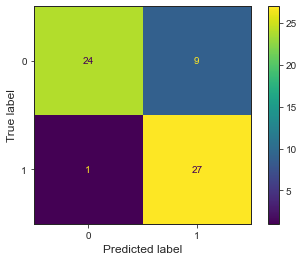

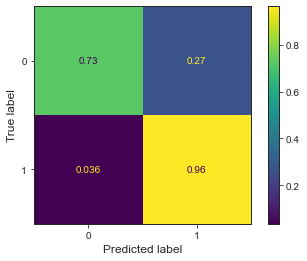

In [67]:
plot_confusion_matrix(clf_grid_lr.best_estimator_,X_test,y_test)
plot_confusion_matrix(clf_grid_lr,X_test,y_test,normalize='true')

In [68]:
y_pred=clf_grid_lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83        33
           1       0.75      0.96      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.85      0.84        61
weighted avg       0.86      0.84      0.84        61



In [69]:
model_dict['LogisticRegression']=clf_grid_lr

### 7. Hard Voting based Ensemble Classifier
In hard voting / majority voting, each of the classifiers votes for a class, and the majority wins. In statistical terms, the predicted target label of the ensemble is the mode of the distribution of individually predicted labels.

We implement a Hard Voting Ensemble Classifier using Logistic Regression, Support Vector Machine with a Gaussian RBF Kernel, Decision Tree & Random Forest Classifiers.

Note : For the individual classifiers, we won't tune the hyperparameters like we did above to improve model accuracy.

In [70]:
clf_hard_voting_estimators = [('LR',LogisticRegression(random_state=1)),
                              ('SVM', SVC(random_state=1)),
                              ('DT', DecisionTreeClassifier(random_state=1)),
                              ('RF', RandomForestClassifier(random_state=1))] 

In [71]:
clf_hard_voting = VotingClassifier(estimators = clf_hard_voting_estimators, voting ='hard') 
clf_hard_voting.fit(X_train, y_train) 

VotingClassifier(estimators=[('LR', LogisticRegression(random_state=1)),
                             ('SVM', SVC(random_state=1)),
                             ('DT', DecisionTreeClassifier(random_state=1)),
                             ('RF', RandomForestClassifier(random_state=1))])

In [72]:
print('Training set Accuracy Score :',clf_hard_voting.score(X_train,y_train))
print('Test set Accuracy Score :',clf_hard_voting.score(X_test,y_test))

Training set Accuracy Score : 0.987603305785124
Test set Accuracy Score : 0.8688524590163934


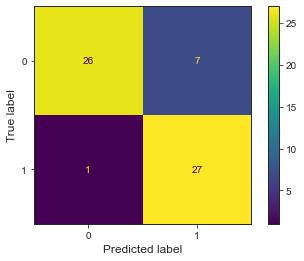

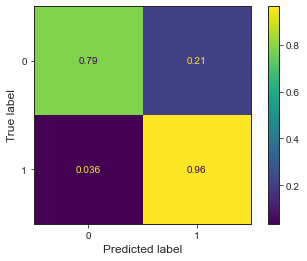

In [73]:
plot_confusion_matrix(clf_hard_voting,X_test,y_test)
plot_confusion_matrix(clf_hard_voting,X_test,y_test,normalize='true')

In [74]:
y_pred=clf_hard_voting.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



In [75]:
model_dict['HardVotingEnsemble']=clf_hard_voting

## Comparitive Evaluation of all Models
In this section, we'll try to figure out the best performing models out of the 7 models trained above by Accuracy Score & F1 Score.

In [76]:
model_dict

{'KNN': GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
              param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19])}),
 'DecisionTree': GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9, None], dtype=object),
                          'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                           13, 14, 15, 16, 17, 18, 19, 20, 21,
                                           22, 23, 24, 25, 26, 27, 28, 29,
                                           None],
                          'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                          'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}),
 'RandomForest': GridSearchCV(cv=10, estimator=RandomForestClassifie

In [77]:
print('Out-of-sample performance : \n')
for model in model_dict:
    y_pred=model_dict[model].predict(X_test)
    print(model,'model - Accuracy Score :',round(accuracy_score(y_test,y_pred),2),'& F1 Score :',round(f1_score(y_test,y_pred),2))

Out-of-sample performance : 

KNN model - Accuracy Score : 0.84 & F1 Score : 0.84
DecisionTree model - Accuracy Score : 0.77 & F1 Score : 0.79
RandomForest model - Accuracy Score : 0.84 & F1 Score : 0.84
SVM model - Accuracy Score : 0.82 & F1 Score : 0.83
NaiveBayes model - Accuracy Score : 0.8 & F1 Score : 0.81
LogisticRegression model - Accuracy Score : 0.84 & F1 Score : 0.84
HardVotingEnsemble model - Accuracy Score : 0.87 & F1 Score : 0.87


In [78]:
print('In-sample performance : \n')
for model in model_dict:
    y_pred=model_dict[model].predict(X_train)
    print(model,'model - Accuracy Score :',round(accuracy_score(y_train,y_pred),2),'& F1 Score :',round(f1_score(y_train,y_pred),2))

In-sample performance : 

KNN model - Accuracy Score : 0.91 & F1 Score : 0.92
DecisionTree model - Accuracy Score : 0.83 & F1 Score : 0.86
RandomForest model - Accuracy Score : 0.86 & F1 Score : 0.89
SVM model - Accuracy Score : 0.93 & F1 Score : 0.94
NaiveBayes model - Accuracy Score : 0.87 & F1 Score : 0.89
LogisticRegression model - Accuracy Score : 0.88 & F1 Score : 0.9
HardVotingEnsemble model - Accuracy Score : 0.99 & F1 Score : 0.99


### Conclusion : 
The Hard Voting Ensemble Model has the highest out-of-sample accuracy score of 0.87 as well as highest F1 score of 0.87 whereas the Decision Tree Model has the lowest out-of-sample accuracy score of 0.77 as well as lowest F1 score of 0.79.

## Limitations of this experiment :
1. Considerably small dataset - It leads to overfitting/ high variance. Outliers become much more dangerous.
2. Small test set size - This prevents us from getting an accurate estimation on our out-of-sample evaluation metric which actually help us estimate how our models will perform in the real world. (Inspite of this, we managed to have an even distribution amongst both classes in our test set as illustrated below.

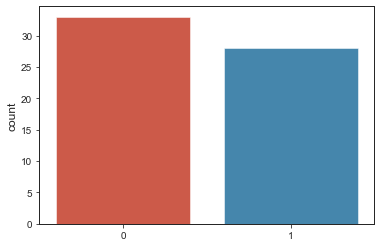

In [79]:
sns.countplot(y_test)

In [80]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([33, 28], dtype=int64))

As we can see, the distribution of classes in the test set is almost uniform.

## Saving the dictionary of models for later use :

In [82]:
pickle.dump(model_dict, open('dict_of_models.pickle', 'wb'))

To load the dictionary of models into your Notebook, use the following line of code :
```python
dict_of_models = pickle.load(open('dict_of_models.pickle','rb'))
```